In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [27]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [28]:
target = train['emission']

In [29]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [30]:
train = train[["latitude", "longitude", "year", "week_no","emission"]]
test = test[["latitude", "longitude", "year", "week_no"]]

In [31]:
train.isnull().sum().sort_values(ascending = False)

latitude     0
longitude    0
year         0
week_no      0
emission     0
dtype: int64

In [32]:
test.isnull().sum().sort_values(ascending = False)

latitude     0
longitude    0
year         0
week_no      0
dtype: int64

In [33]:
#Feature Engineering
train['month'] = train['week_no'] // 4.3445
train['covid_start'] = ((train['year'] == 2020) & (train['month'].isin([3, 4]))).astype(int)
train['lockdown_period'] = ((train['year'] == 2020) & (train['month'].isin([3, 4]))).astype(int)
train['Covid_period'] = (((train['year'] == 2020) & (train['month'] >= 3)) | ((train['year'] == 2021) & (train['month'] <= 8))).astype(int).astype(int)

train.head()

,latitude,longitude,year,week_no,emission,month,covid_start,lockdown_period,Covid_period
0,-0.51,29.29,2019,0,3.750994,0.0,0,0,0
1,-0.51,29.29,2019,1,4.025176,0.0,0,0,0
2,-0.51,29.29,2019,2,4.231381,0.0,0,0,0
3,-0.51,29.29,2019,3,4.305286,0.0,0,0,0
4,-0.51,29.29,2019,4,4.347317,0.0,0,0,0


In [34]:
#Feature Engineering
test['month'] = test['week_no'] // 4.3445
test['covid_start'] = ((test['year'] == 2020) & (test['month'].isin([3, 4]))).astype(int)
test['lockdown_period'] = ((test['year'] == 2020) & (test['month'].isin([3, 4]))).astype(int)
test['Covid_period'] = (((test['year'] == 2020) & (test['month'] >= 2)) | ((test['year'] == 2021) & (test['month'] <= 7))).astype(int).astype(int)
test.head()



,latitude,longitude,year,week_no,month,covid_start,lockdown_period,Covid_period
0,-0.51,29.29,2022,0,0.0,0,0,0
1,-0.51,29.29,2022,1,0.0,0,0,0
2,-0.51,29.29,2022,2,0.0,0,0,0
3,-0.51,29.29,2022,3,0.0,0,0,0
4,-0.51,29.29,2022,4,0.0,0,0,0


In [35]:
train = train.drop(['emission'],axis=1)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         79023 non-null  float64
 1   longitude        79023 non-null  float64
 2   year             79023 non-null  int64  
 3   week_no          79023 non-null  int64  
 4   month            79023 non-null  float64
 5   covid_start      79023 non-null  int32  
 6   lockdown_period  79023 non-null  int32  
 7   Covid_period     79023 non-null  int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 3.9 MB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


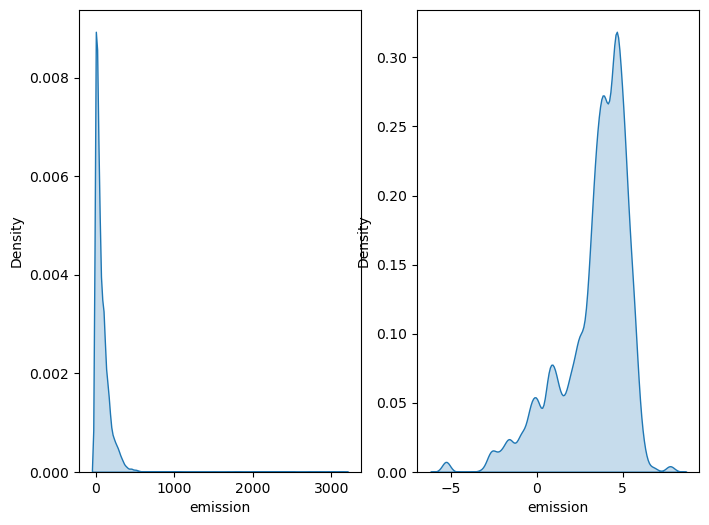

In [37]:
#dist plot to get the skewness of the target
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.kdeplot(target, shade=True)

plt.subplot(1,2,2)
sns.kdeplot(np.log(target), shade=True)
plt.show()

In [38]:
y_train = target
X_train = train

In [39]:
X_train.shape

(79023, 8)

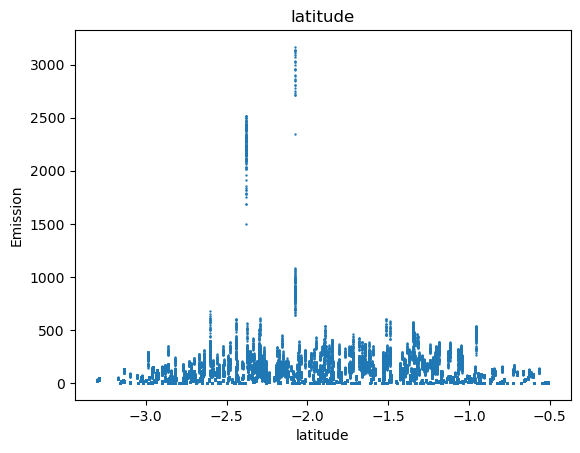

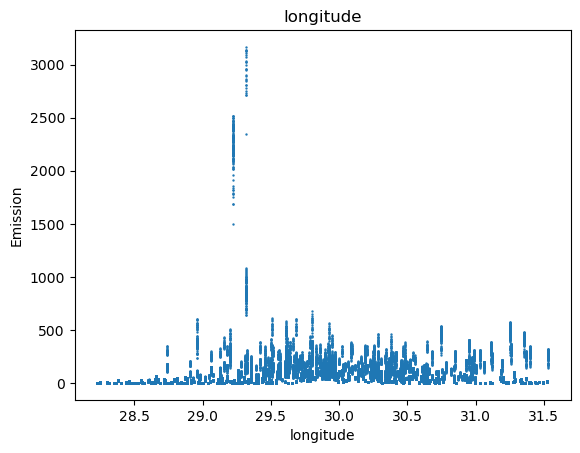

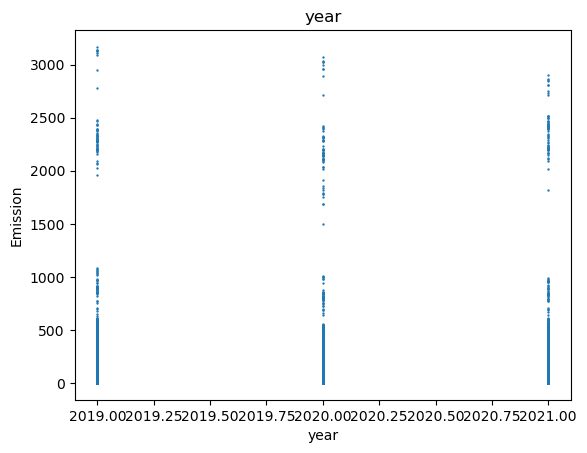

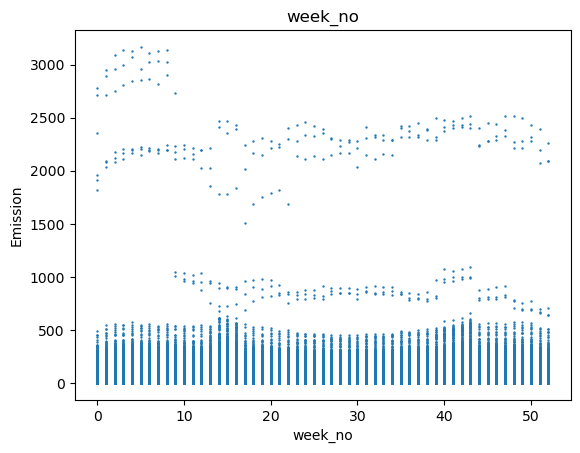

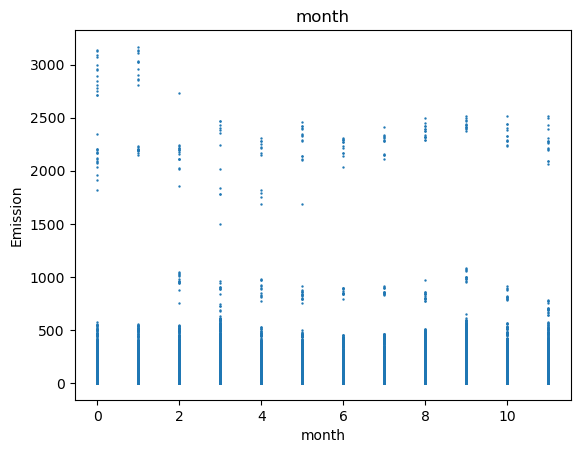

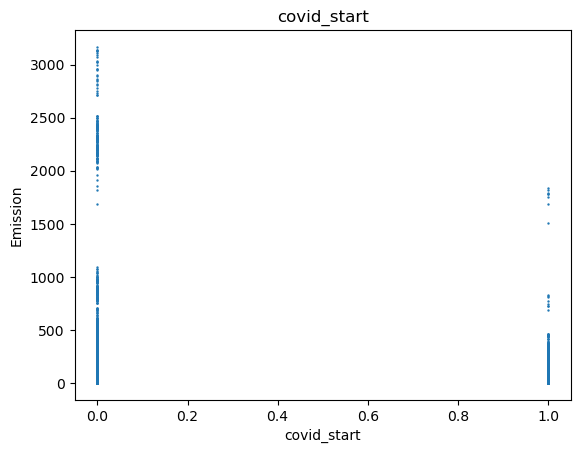

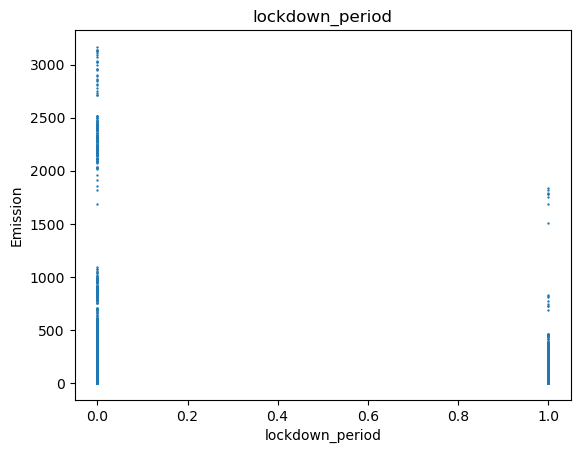

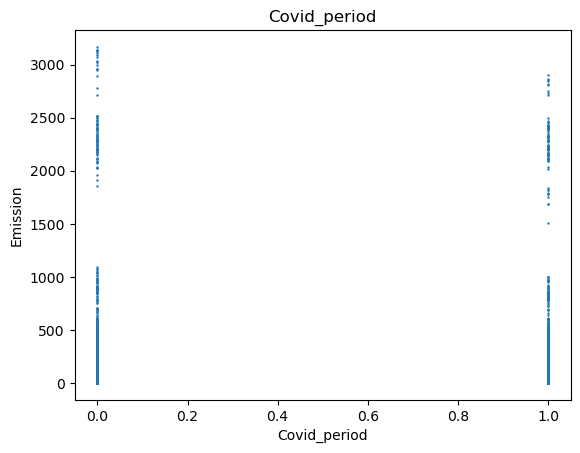

In [40]:
for label in X_train.columns:
    plt.scatter(X_train[label], y_train, s=0.5)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Emission")
    plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X_train_splitted, X_val, y_train_splitted, y_val = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
#model = RandomForestRegressor(n_jobs=-1, random_state=3788)


model = Pipeline([("scalar", MinMaxScaler()),
                      ("forest", RandomForestRegressor(n_jobs=-1, random_state=3788))])

In [43]:
model.fit(X_train_splitted, y_train_splitted)

Pipeline(steps=[('scalar', MinMaxScaler()),
                ('forest',
                 RandomForestRegressor(n_jobs=-1, random_state=3788))])

In [44]:
pred_val = model.predict(X_val)
score_val = mean_absolute_error(pred_val, y_val)
print(model, "has a mean absolute error :", score_val)

Pipeline(steps=[('scalar', MinMaxScaler()),
                ('forest',
                 RandomForestRegressor(n_jobs=-1, random_state=3788))]) has a mean absolute error : 3.287886777390363


In [45]:
model.fit(X_train, y_train)

Pipeline(steps=[('scalar', MinMaxScaler()),
                ('forest',
                 RandomForestRegressor(n_jobs=-1, random_state=3788))])

In [46]:
pred = model.predict(test)

In [47]:
submission = pd.read_csv('sample_submission.csv')
submission

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94
2,ID_-0.510_29.290_2022_02,81.94
3,ID_-0.510_29.290_2022_03,81.94
4,ID_-0.510_29.290_2022_04,81.94
...,...,...
24348,ID_-3.299_30.301_2022_44,81.94
24349,ID_-3.299_30.301_2022_45,81.94
24350,ID_-3.299_30.301_2022_46,81.94
24351,ID_-3.299_30.301_2022_47,81.94


In [48]:
submission['emission'] = pred
submission

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.485043
1,ID_-0.510_29.290_2022_01,3.971860
2,ID_-0.510_29.290_2022_02,4.055804
3,ID_-0.510_29.290_2022_03,4.085371
4,ID_-0.510_29.290_2022_04,4.169659
...,...,...
24348,ID_-3.299_30.301_2022_44,29.505163
24349,ID_-3.299_30.301_2022_45,29.663088
24350,ID_-3.299_30.301_2022_46,29.754071
24351,ID_-3.299_30.301_2022_47,30.001054


In [49]:
submission.to_csv('submission_v1.csv', index=False)